Read Original data D

1.1. Apply Association Rule Mining (ARM) algorithm on Original data D to extract the frequent itemsets and their corresponding association rules.


1.2. Filter out the frequent features from the association rules obtained in step 1.1 based on a pre-defined support and confidence threshold.


1.3. Store the filtered association rules in the rules repository R for future use.

for train data = Original train data

for Test data = Original Test data


In [1]:
import sys
# config the path of your project
sys.path.append(r"F:\Lecture\Project\Project for Network IDS")

# Load Packages and Dataset

In [2]:
#importing packages that are necessary
from config import *

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline
from tqdm import tqdm
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [3]:
#reading training data to understant existing features and dimentions of the same. 
train_data =pd.read_csv(TRAIN_DATASET_PATH)
print(train_data.shape)
train_data.head(10) #printing the top 10 records 

(175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


Rectangle(xy=(-0.4, 0), width=0.8, height=56000, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=119341, angle=0)
[     0.   17534.1  35068.2  52602.3  70136.4  87670.5 105204.6 122738.7
 140272.8 157806.9 175341. ]


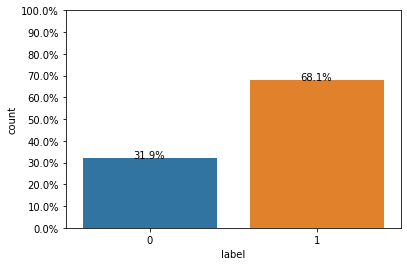

In [4]:
total = len(train_data)*1.
ax=sns.countplot(x="label", data=train_data)
for p in ax.patches:
    print(p)
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))

#on y axis  from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
print(ax.yaxis.get_majorticklocs())
# with out changing the position converting to percentage on y axis without changing the positions. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.savefig('class__feature_label.png')
plt.show()

# ML Process

## Feature Map (Category to Numerical)

In [5]:
print(train_data.shape)
train_data.head()

(175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [6]:
cat_feature = train_data.select_dtypes(include=['category', object]).columns

In [7]:
from sklearn.preprocessing import LabelEncoder
train_data[cat_feature] = train_data[cat_feature].apply(LabelEncoder().fit_transform)
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


Input Live Data as Test Data

3.1. Collect the live data to be tested and preprocess it to make it compatible with the train data T1.

In [8]:
test_data = pd.read_csv(TEST_DATASET_PATH)
print(test_data.shape)
test_data.head()

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [9]:
cat_feature_test = test_data.select_dtypes(include=['category', object]).columns

In [10]:
test_data[cat_feature_test] = test_data[cat_feature_test].apply(LabelEncoder().fit_transform)
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,6,0


In [11]:
test_data['label'].value_counts()

1    45332
0    37000
Name: label, dtype: int64

## Correlation map (drop some features)

In [12]:
df_corr = train_data.corr()

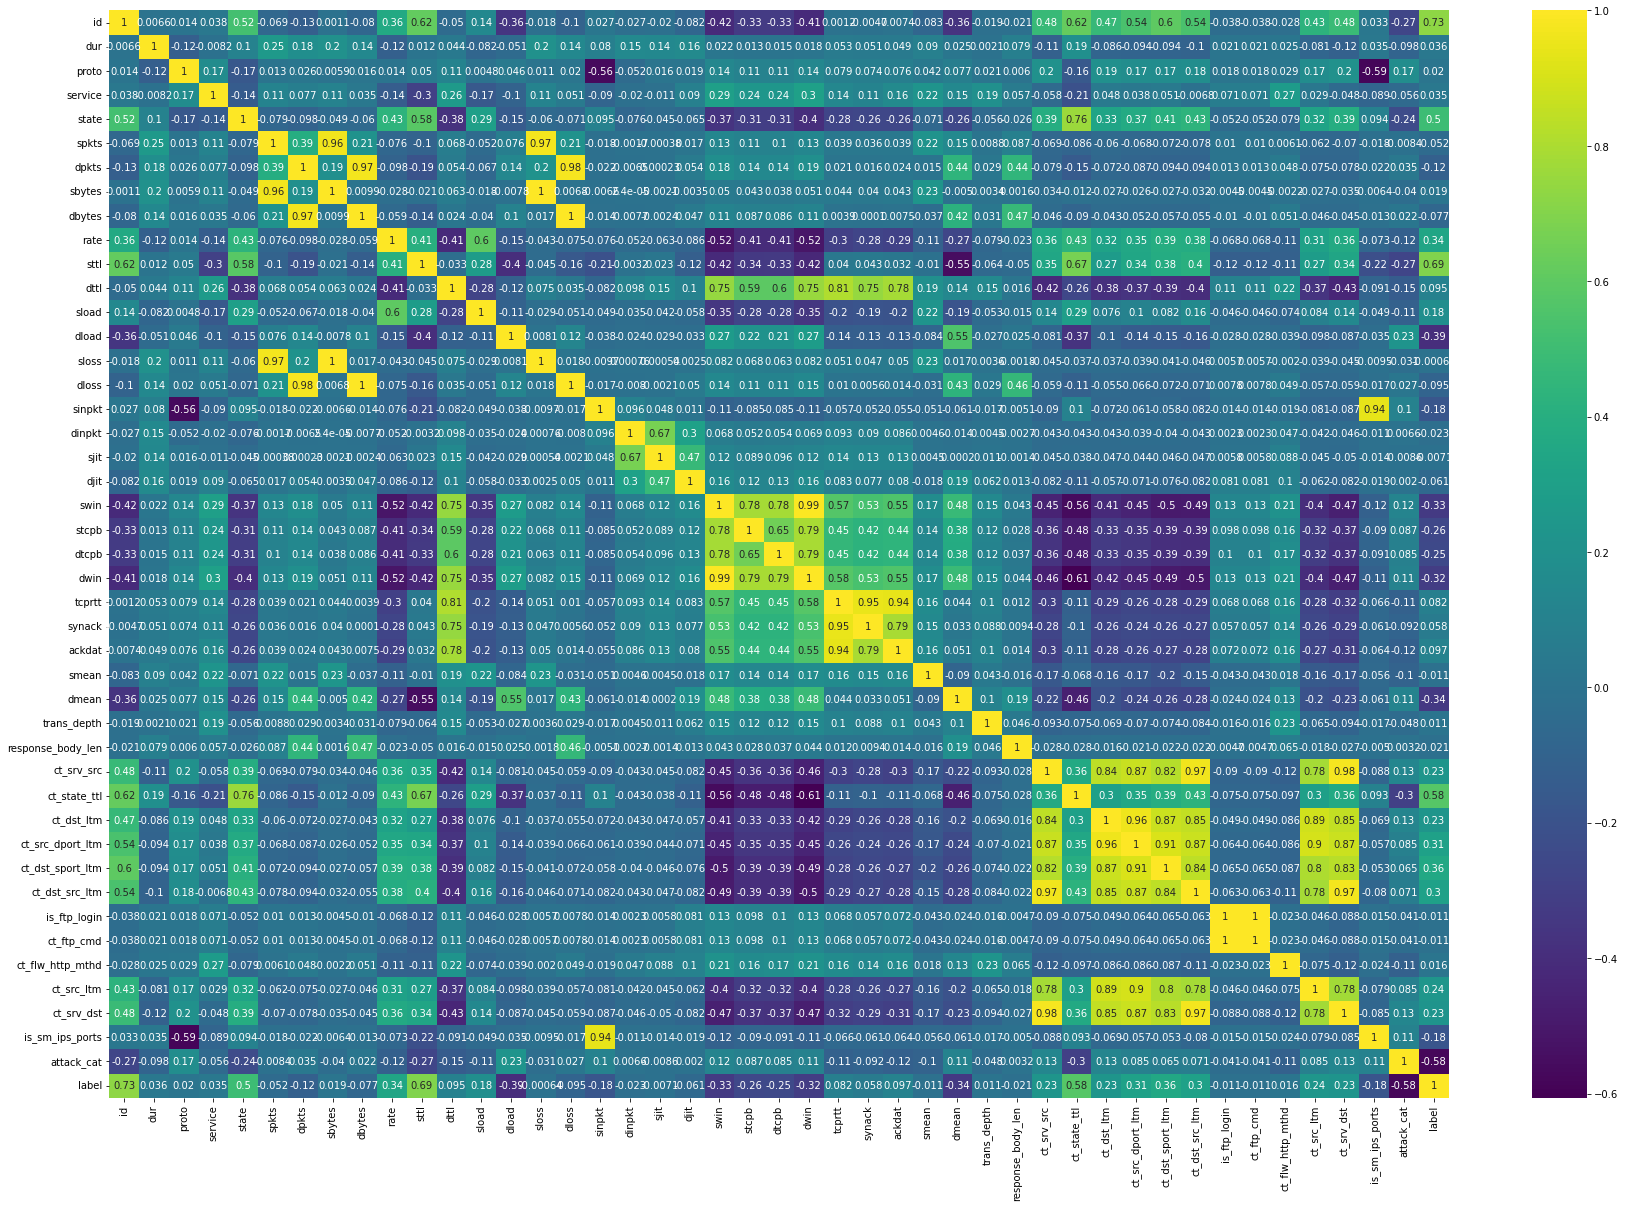

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.viridis)
plt.savefig('correlation_matrix.png')
plt.show()

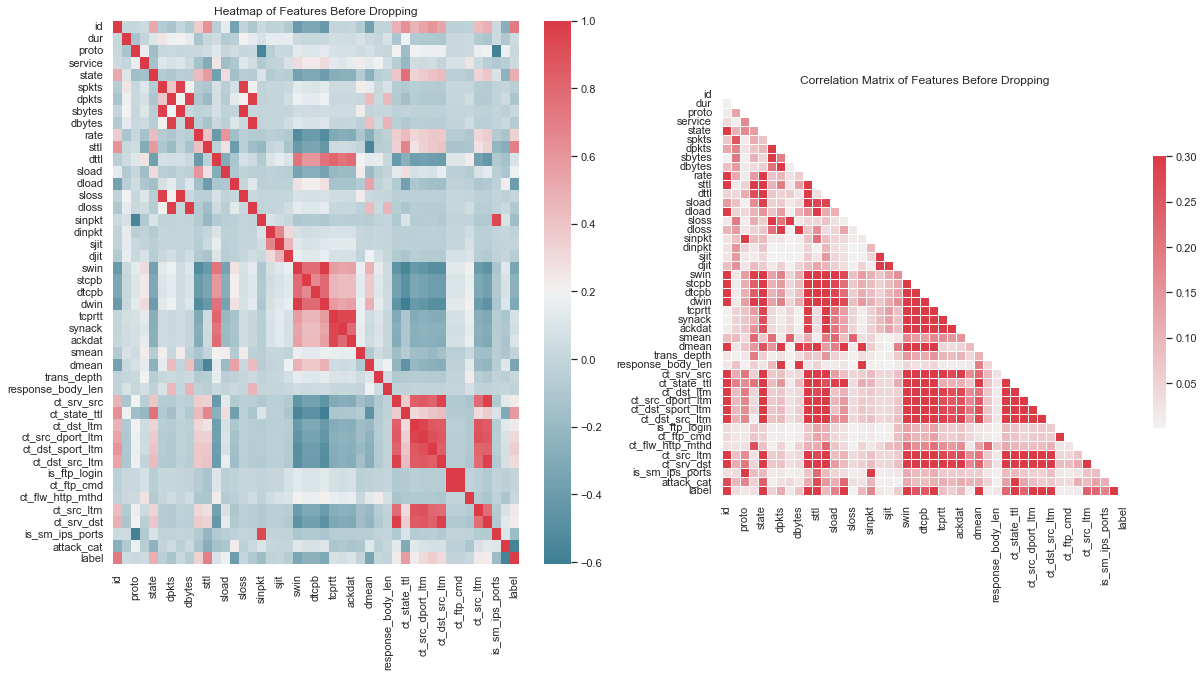

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation matrix
sns.set(style="white")
corr_matrix = train_data.corr().abs()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(1, 2, figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_data.corr(), cmap=cmap, ax=ax[0])
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
ax[0].set_title('Heatmap of Features Before Dropping')
ax[1].set_title('Correlation Matrix of Features Before Dropping')
plt.show()

In [15]:
train_data.drop(['sbytes', 'dbytes','ct_srv_dst', 'ct_ftp_cmd', 'dwin'], axis=1, inplace=True)
test_data.drop(['sbytes', 'dbytes','ct_srv_dst', 'ct_ftp_cmd', 'dwin'], axis=1, inplace=True)
df_train = train_data
df_test = test_data

Train the Machine and Standardize the data

4.1. Train a machine learning model on the preprocessed D' obtained in step 2.1.

## Data Preprocessing

In [16]:
df_test[df_test.isnull().values==True]

,id,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label


In [17]:
from sklearn import preprocessing
x = df_train.values
x_test = df_test.values
std_scaler = preprocessing.MinMaxScaler()
std_scaler.fit(x)
x_scaled = std_scaler.transform(x)
df_train = pd.DataFrame(x_scaled)
x_scaled_test = std_scaler.transform(x_test)
df_test = pd.DataFrame(x_scaled_test)

In [18]:
y_train = train_data['label']
y_test = df_test[39]
df_train = df_train.iloc[:, :38]
df_test = df_test.iloc[:, :38]
print("train data shape", df_train.shape, y_train.shape)
print("test data shape", df_test.shape, y_test.shape)

train data shape (175341, 38) (175341,)
test data shape (82332, 38) (82332,)


In [19]:
#Logistic Regression Model
[10 ** x for x in range(-5, 2)]

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]

Apply Classification

5.1. Using the trained machine learning model, classify the preprocessed live data obtained in step 3.1.

Print Accuracy

6.1. Evaluate the accuracy of the classification model on the live data using appropriate metrics such 
as accuracy, precision, recall, and F1-score.

## ML Models

In [20]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

### Logistic Regression Model

In [21]:
# #Logistic Regression Model
# prams={
#     'alpha':[10 ** x for x in range(-4, 1)],
#      'max_iter':[5, 10, 20, 50, 100],
#     'eta0': [10 ** x for x in range(-4, 1)]
# }
# lr_cfl=GridSearchCV(SGDClassifier(penalty='l2', loss='log', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
# lr_cfl.fit(df_train,y_train)

In [22]:
# results = pd.DataFrame.from_dict(lr_cfl.cv_results_)
# results = results.sort_values(['rank_test_score'])
# results.head()

In [23]:
# print(lr_cfl.best_params_)

In [24]:
# logisticR=SGDClassifier(alpha=lr_cfl.best_params_['alpha'],eta0=lr_cfl.best_params_['eta0'], penalty='l2', loss='log', n_jobs = -1, max_iter=lr_cfl.best_params_['max_iter'])
# logisticR.fit(df_train,y_train)
# sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
# sig_clf.fit(df_train, y_train)
# predict_y_tr_lr = sig_clf.predict(df_train)
# predict_y_te_lr = sig_clf.predict(df_test)
# lr_f1 = f1_score(y_test, predict_y_te_lr)
# print(lr_f1)

In [25]:
# cm_lr = confusion_matrix(y_test, predict_y_te_lr)

In [26]:
# tn, fp, fn, tp = cm_lr.ravel()

In [27]:
# fpr_lr = fp/(fp+tn)*100
# fnr_lr = fn/(fn+tp)*100
# far_lr = (fpr_lr+fnr_lr)/2
# print("FAR: %0.2f" %far_lr)

In [28]:
# def plot_cm(cm):
#     sns.heatmap(cm, annot=True, cmap=sns.light_palette("blue"), fmt="g")
#     plt.xlabel('Predicted Class')
#     plt.ylabel('Original Class')
#     plt.title("Confusion matrix")
#     plt.show()

In [29]:
# plot_cm(cm_lr)

In [30]:
# from sklearn.metrics import roc_curve, auc
# def plot_roc_curve(fpr_tr, tpr_tr,fpr_te, tpr_te):
#     '''
#     plot the ROC curve for the FPR and TPR value
#     '''
#     plt.plot(fpr_te, tpr_te, 'k.-', color='orange', label='ROC_test AUC:%.3f'% auc(fpr_te, tpr_te))
#     plt.plot(fpr_tr, tpr_tr, 'k.-', color='green', label='ROC_train AUC:%.3f'% auc(fpr_tr, tpr_tr))
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()

In [31]:
# #finding the FPR and TPR for logistic reg model set
# fpr_te_lr, tpr_te_lr, t_te_lr = roc_curve(y_test, predict_y_te_lr)
# fpr_tr_lr, tpr_tr_lr, t_tr_lr = roc_curve(y_train, predict_y_tr_lr)
# auc_te_lr = auc(fpr_te_lr, tpr_te_lr)
# print("AUC_LR: ",auc_te_lr)
# plot_roc_curve(fpr_tr_lr,tpr_tr_lr,fpr_te_lr, tpr_te_lr)

### Support Vector Machine Model 

In [32]:
# # Support Vector Machine Model 

# prams={
#     'alpha':[10 ** x for x in range(-4, 1)],
#      'max_iter':[5, 10, 20, 50, 100],
#     'eta0': [10 ** x for x in range(-4, 1)]
# }
# svm_cfl=GridSearchCV(SGDClassifier(penalty='l1', loss='hinge', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
# svm_cfl.fit(df_train,y_train)


In [33]:
# print(svm_cfl.best_params_)

In [34]:
# svm=SGDClassifier(alpha=svm_cfl.best_params_['alpha'],eta0=svm_cfl.best_params_['eta0'], penalty='l2', loss='hinge', n_jobs = -1, max_iter=svm_cfl.best_params_['max_iter'])
# svm.fit(df_train,y_train)
# sig_clf_svm = CalibratedClassifierCV(svm, method="sigmoid")
# sig_clf_svm.fit(df_train, y_train)
# predict_y_tr_svm = sig_clf.predict(df_train)
# predict_y_te_svm = sig_clf_svm.predict(df_test)
# svm_f1 = f1_score(y_test, predict_y_te_svm)
# print("F1-Score", svm_f1)

In [35]:
# cm_svm = confusion_matrix(y_test, predict_y_te_svm)

In [36]:
# tn, fp, fn, tp = cm_svm.ravel()

In [37]:
# fpr_svm = fp/(fp+tn)*100
# fnr_svm = fn/(fn+tp)*100
# far_svm = (fpr_svm+fnr_svm)/2
# print("FAR: %0.2f" % far_svm)

In [38]:
# plot_cm(cm_svm)

In [39]:
# #finding the FPR and TPR for SVM set
# fpr_te_svm, tpr_te_svm, t_te_svm = roc_curve(y_test, predict_y_te_svm)
# fpr_tr_svm, tpr_tr_svm, t_tr_svm = roc_curve(y_train, predict_y_tr_svm)
# auc_te_svm = auc(fpr_te_svm, tpr_te_svm)
# print("AUC_SVM: ",auc_te_svm)
# plot_roc_curve(fpr_tr_svm,tpr_tr_svm,fpr_te_svm, tpr_te_svm)

### Random Forest Model

In [40]:
# # Random Forest Model
# param_grid = {"n_estimators": [10,100,500,1000, 2000],
#     "min_samples_split": [50, 80, 120, 200],
#               "max_depth": [3, 5, 10, 50, 100]}
# rfc = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1)
# gridCV_rfc = GridSearchCV(rfc, param_grid, cv=3, return_train_score=True, verbose=10, n_jobs=-1)
# gridCV_rfc.fit(df_train, y_train)
# #grid Search cv results are stored in result for future use
# results_rfc = pd.DataFrame.from_dict(gridCV_rfc.cv_results_)

In [41]:
# results_rfc = results_rfc.sort_values(['rank_test_score'])
# results_rfc.head()

In [42]:
# print(gridCV_rfc.best_params_)

In [43]:
# rfc= RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=gridCV_rfc.best_params_['max_depth'],min_samples_split=gridCV_rfc.best_params_['min_samples_split'], n_estimators=gridCV_rfc.best_params_['n_estimators'])
# rfc.fit(df_train,y_train)
# sig_clf_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
# sig_clf_rfc.fit(df_train, y_train)
# predict_y_tr_rfc = sig_clf_rfc.predict(df_train)
# predict_y_te_rfc = sig_clf_rfc.predict(df_test)
# rfc_f1 = f1_score(y_test, predict_y_te_rfc)
# print(rfc_f1)

In [44]:
# cm_rfc = confusion_matrix(y_test, predict_y_te_rfc)

In [45]:
# tn, fp, fn, tp = cm_rfc.ravel()

In [46]:
# fpr_rfc = fp/(fp+tn)*100
# fnr_rfc = fn/(fn+tp)*100
# far_rfc = (fpr_rfc+fnr_rfc)/2
# print("far:",far_rfc)

In [47]:
# plot_cm(cm_rfc)

In [48]:
# #finding the FPR and TPR for RFC set
# fpr_te_rfc, tpr_te_rfc, t_te_rfc = roc_curve(y_test, predict_y_te_rfc)
# fpr_tr_rfc, tpr_tr_rfc, t_tr_rfc = roc_curve(y_train, predict_y_tr_rfc)
# auc_te_rfc = auc(fpr_te_rfc, tpr_te_rfc)
# print("AUC_RFC: ",auc_te_rfc)
# plot_roc_curve(fpr_tr_rfc,tpr_tr_rfc,fpr_te_rfc, tpr_te_rfc)

### Stacking classifier (above 3)

In [49]:
#Stacking classifier

clf1 = SGDClassifier(alpha=0.0001,eta0=0.001, penalty='l2', loss='log', n_jobs = -1, max_iter=100)
clf1.fit(df_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001,eta0=0.01, penalty='l2', loss='hinge', n_jobs = -1, max_iter=100)
clf2.fit(df_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=50,min_samples_split=50, n_estimators=2000)
clf3.fit(df_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

In [50]:
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
    sclf.fit(df_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log loss: %0.3f F1-score: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(df_test)),f1_score(y_test, sclf.predict(df_test))))
    log_error =log_loss(y_test, sclf.predict_proba(df_test))
    if best_alpha > log_error:
        best_alpha = log_error

Stacking Classifer : for the value of alpha: 0.000100 Log loss: 0.609 F1-score: 0.811
Stacking Classifer : for the value of alpha: 0.001000 Log loss: 0.605 F1-score: 0.807
Stacking Classifer : for the value of alpha: 0.010000 Log loss: 0.591 F1-score: 0.793
Stacking Classifer : for the value of alpha: 0.100000 Log loss: 0.687 F1-score: 0.684
Stacking Classifer : for the value of alpha: 1.000000 Log loss: 0.615 F1-score: 0.741
Stacking Classifer : for the value of alpha: 10.000000 Log loss: 0.871 F1-score: 0.677


In [51]:
lr = LogisticRegression(C=10)
sig_clf_sc = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
sig_clf_sc.fit(df_train, y_train)
predict_y_tr_sc= sig_clf_sc.predict(df_train)
predict_y_te_sc = sig_clf_sc.predict(df_test)
sc_f1 = f1_score(y_test, predict_y_te_sc)
print(sc_f1)

0.685899565770328


In [52]:
cm_sc = confusion_matrix(y_test, predict_y_te_sc)

In [53]:
tn, fp, fn, tp = cm_sc.ravel()

In [54]:
fpr_sc = fp/(fp+tn)*100
fnr_sc = fn/(fn+tp)*100
far_sc = (fpr_sc+fnr_sc)/2
print("far:",far_sc)

far: 33.22252856403567


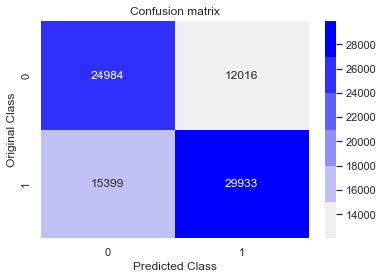

In [56]:
from utils.graph_utils import *
plot_cm(cm_sc)

AUC_SC:  0.6677747143596433


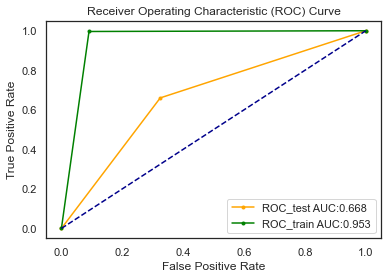

In [57]:
#finding the FPR and TPR for RFC set
fpr_te_sc, tpr_te_sc, t_te_sc = roc_curve(y_test, predict_y_te_sc)
fpr_tr_sc, tpr_tr_sc, t_tr_sc = roc_curve(y_train, predict_y_tr_sc)
auc_te_sc = auc(fpr_te_sc, tpr_te_sc)
print("AUC_SC: ",auc_te_sc)
plot_roc_curve(fpr_tr_sc,tpr_tr_sc,fpr_te_sc, tpr_te_sc)

### Adaboost

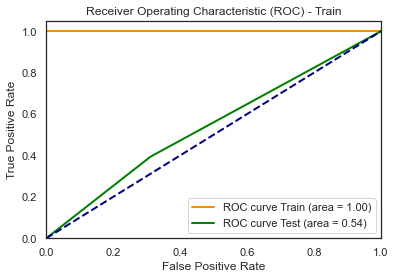

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
ada.fit(df_train, y_train)
y_pred_train = ada.predict(df_train)
y_pred_test = ada.predict(df_test)
# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
# ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train1 = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test1 = auc(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % roc_auc_train1)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve Test (area = %0.2f)' % roc_auc_test1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train')
plt.legend(loc="lower right")
plt.show()

In [59]:
ada_f1 = f1_score(y_test, y_pred_test)
print(ada_f1)

0.4779919678714859


In [60]:
cm_ada = confusion_matrix(y_test, y_pred_test)

In [61]:
tn, fp, fn, tp = cm_ada.ravel()

In [62]:
fpr_ada = fp/(fp+tn)*100
fnr_ada = fn/(fn+tp)*100
far_ada = (fpr_ada+fnr_ada)/2
print("far:",far_ada)

far: 45.86942282881134


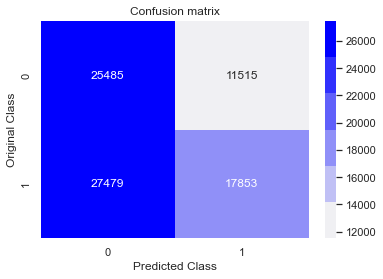

In [63]:
plot_cm(cm_ada)

### Ensemble with SVM

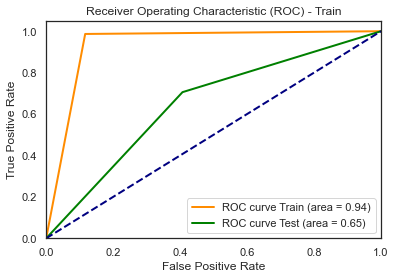

In [64]:
#Ensemble with SVM

from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Initialize the SVM models
svm1 = svm.SVC(kernel='linear', C=1)
svm2 = svm.SVC(kernel='rbf', gamma=0.1, C=1)
svm3 = svm.SVC(kernel='poly', degree=3, C=1)

# Initialize the voting classifier
ensemble = VotingClassifier(estimators=[('linear', svm1), ('rbf', svm2), ('poly', svm3)], voting='hard')

# Train the ensemble model
ensemble.fit(df_train, y_train)

# Make predictions on the test set
y_pred_train = ensemble.predict(df_train)
y_pred_test = ensemble.predict(df_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
# ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve Test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train')
plt.legend(loc="lower right")
plt.show()

In [65]:
en_svm_f1 = f1_score(y_test, y_pred_test)
print(en_svm_f1)

0.6925649712621905


In [66]:
cm_en_svm = confusion_matrix(y_test, y_pred_test)

In [67]:
tn, fp, fn, tp = cm_en_svm.ravel()

In [68]:
fpr_en_svm = fp/(fp+tn)*100
fnr_en_svm = fn/(fn+tp)*100
far_en_svm = (fpr_en_svm+fnr_en_svm)/2
print("far:",far_en_svm)

far: 35.06907345446567


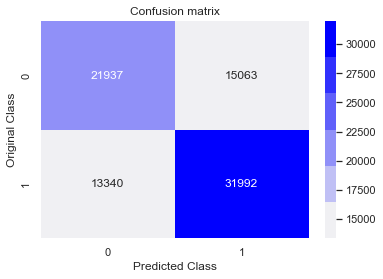

In [69]:
plot_cm(cm_en_svm)

In [70]:
pip install prettytable


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)'))) - skipping


### xgboost Model

Accuracy: 0.5044939999028324


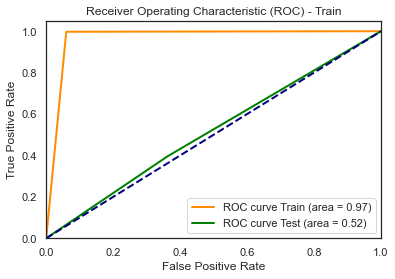

In [71]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
xgb_model.fit(df_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(df_test)

# Evaluate the accuracy of the model
accuracy = xgb_model.score(df_test, y_test)
print("Accuracy:", accuracy)


# Make predictions on the test set
y_pred_train = xgb_model.predict(df_train)
y_pred_test = xgb_model.predict(df_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
# ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
xg_roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
xg_roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % xg_roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve Test (area = %0.2f)' % xg_roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train')
plt.legend(loc="lower right")
plt.show()



In [72]:
xg_f1 = f1_score(y_test, y_pred_test)
print(xg_f1)

0.46783198539003396


In [73]:
cm_xg = confusion_matrix(y_test, y_pred_test)

In [74]:
tn, fp, fn, tp = cm_xg.ravel()

In [75]:
fpr_xg = fp/(fp+tn)*100
fnr_xg = fn/(fn+tp)*100
far_xg = (fpr_xg+fnr_xg)/2
print("far:",far_xg)

far: 48.32417980497041


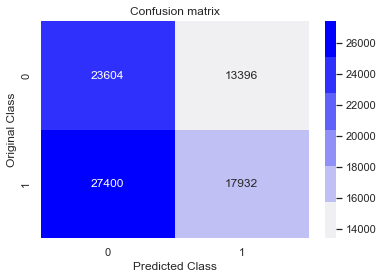

In [76]:
plot_cm(cm_xg)

### GBDT

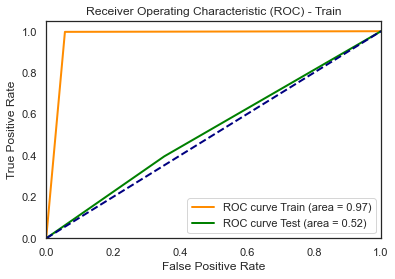

In [77]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the Gradient Boosting classifier object
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Train the classifier on the training data
clf.fit(df_train, y_train)

# Make predictions on the test set
y_pred_train = clf.predict(df_train)
y_pred_test = clf.predict(df_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
clf_roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
clf_roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % clf_roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve Test (area = %0.2f)' % clf_roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train')
plt.legend(loc="lower right")
plt.show()


In [78]:
clf_f1 = f1_score(y_test, y_pred_test)
print(clf_f1)

0.470133511523394


In [79]:
cm_clf = confusion_matrix(y_test, y_pred_test)

In [80]:
tn, fp, fn, tp = cm_clf.ravel()

In [81]:
fpr_clf = fp/(fp+tn)*100
fnr_clf = fn/(fn+tp)*100
far_clf = (fpr_clf+fnr_clf)/2
print("far:",far_clf)

far: 47.846685474851014


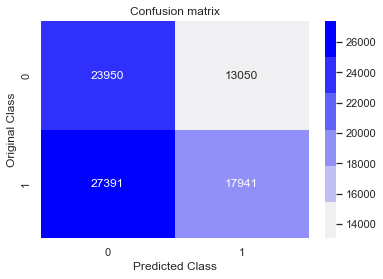

In [82]:
plot_cm(cm_clf)

In [83]:
'''''
from sklearn.metrics import accuracy_score, confusion_matrix

# Get the unique attack categories in the test set
attack_categories = df_test[22].unique()

for category in attack_categories:
    # Filter the test set to include only samples from the current attack category
    category_mask = df_test[22] == category
    df_category_test = df_test[category_mask]
    y_category_test = y_test[category_mask]
    
    # Make predictions on the filtered test set using the trained classifier
    y_category_pred = clf.predict(df_category_test)
    
    # Compute the accuracy and FAR for the current attack category
    category_accuracy = accuracy_score(y_category_test, y_category_pred)
    tn, fp, fn, tp = confusion_matrix(y_category_test, y_category_pred).ravel()
    fpr = fp/(fp+tn)
    fnr = fn/(fn+tp)
    far = (fpr + fnr) / 2
    
    # Print the results for the current attack category
    print(f"Attack category: {category}")
    print(f"Accuracy: {category_accuracy:.4f}")
    print(f"FAR: {far:.4f}")
    print()
'''''

'\'\'\nfrom sklearn.metrics import accuracy_score, confusion_matrix\n\n# Get the unique attack categories in the test set\nattack_categories = df_test[22].unique()\n\nfor category in attack_categories:\n    # Filter the test set to include only samples from the current attack category\n    category_mask = df_test[22] == category\n    df_category_test = df_test[category_mask]\n    y_category_test = y_test[category_mask]\n    \n    # Make predictions on the filtered test set using the trained classifier\n    y_category_pred = clf.predict(df_category_test)\n    \n    # Compute the accuracy and FAR for the current attack category\n    category_accuracy = accuracy_score(y_category_test, y_category_pred)\n    tn, fp, fn, tp = confusion_matrix(y_category_test, y_category_pred).ravel()\n    fpr = fp/(fp+tn)\n    fnr = fn/(fn+tp)\n    far = (fpr + fnr) / 2\n    \n    # Print the results for the current attack category\n    print(f"Attack category: {category}")\n    print(f"Accuracy: {category_a

## Model Evaluation

In [84]:
#Model Evaluation
import prettytable
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "F1 Score", "AUC","FPR %","FNR %","FAR %"]
#x.add_row(["Logistic Regression", "{0:.4}".format(lr_f1), "{0:.4}".format(auc_te_lr),"%.2f" % float(fpr_lr),"%.2f" % float(fnr_lr),"%.2f" % float(far_lr)])
#x.add_row(["Linear SVM", "{0:.4}".format(svm_f1), "{0:.4}".format(auc_te_svm),"%.2f" % float(fpr_svm),"%.2f" % float(fnr_svm),"%.2f" % float(far_svm)])
#x.add_row(["Random Forest", "{0:.4}".format(rfc_f1), "{0:.4}".format(auc_te_rfc),"%.2f" % float(fpr_rfc),"%.2f" % float(fnr_rfc),"%.2f" % float(far_rfc)])
x.add_row(["Stacking Classifier with (LR,SVM, RF)", "{0:.4}".format(sc_f1), "{0:.4}".format(auc_te_sc),"%.2f" % float(fpr_sc),"%.2f" % float(fnr_sc),"%.2f" % float(far_sc)])
x.add_row(["Ensemble with SVM", "{0:.4}".format(en_svm_f1), "{0:.4}".format(roc_auc_test),"%.2f" % float(fpr_en_svm),"%.2f" % float(fnr_en_svm),"%.2f" % float(far_en_svm)])
x.add_row(["AdaBoost classifier with Decision Tree", "{0:.4}".format(ada_f1), "{0:.4}".format(roc_auc_test1),"%.2f" % float(fpr_ada),"%.2f" % float(fnr_ada),"%.2f" % float(far_ada)])
x.add_row(["Gradient Boosting classifier", "{0:.4}".format(clf_f1), "{0:.4}".format(clf_roc_auc_test),"%.2f" % float(fpr_clf),"%.2f" % float(fnr_clf),"%.2f" % float(far_clf)])
x.add_row(["XGBoost classifier (ext of GBoost )", "{0:.4}".format(xg_f1), "{0:.4}".format(xg_roc_auc_test),"%.2f" % float(fpr_xg),"%.2f" % float(fnr_xg),"%.2f" % float(far_xg)])
print(x)


+----------------------------------------+----------+--------+-------+-------+-------+
|                 Model                  | F1 Score |  AUC   | FPR % | FNR % | FAR % |
+----------------------------------------+----------+--------+-------+-------+-------+
| Stacking Classifier with (LR,SVM, RF)  |  0.6859  | 0.6678 | 32.48 | 33.97 | 33.22 |
|           Ensemble with SVM            |  0.6926  | 0.6493 | 40.71 | 29.43 | 35.07 |
| AdaBoost classifier with Decision Tree |  0.478   | 0.5413 | 31.12 | 60.62 | 45.87 |
|      Gradient Boosting classifier      |  0.4701  | 0.5215 | 35.27 | 60.42 | 47.85 |
|  XGBoost classifier (ext of GBoost )   |  0.4678  | 0.5168 | 36.21 | 60.44 | 48.32 |
+----------------------------------------+----------+--------+-------+-------+-------+


In [85]:
import csv
csv_file_path = "csvs/model_evaluation.csv"
table_data = [
    ["Model", "F1 Score", "AUC", "FPR %", "FNR %", "FAR %"]
]

for model_name, model_metrics_list in metrics.items():
    table_data.append([model_name] + [round(value, 4) for value in model_metrics_list[1:]])

with open(csv_file_path, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(table_data)

print(f"Data has been written to {csv_file_path}")

NameError: name 'metrics' is not defined